In [7]:
import cv2
import numpy as np
import imutils
from utils.cttutils import displayImage

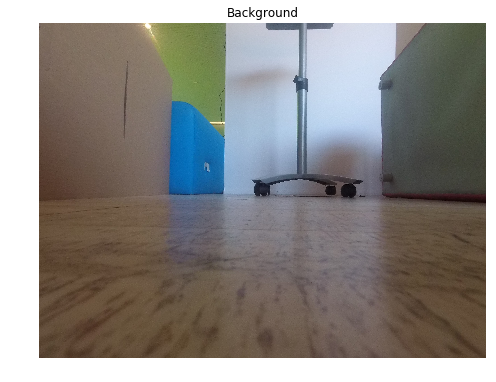

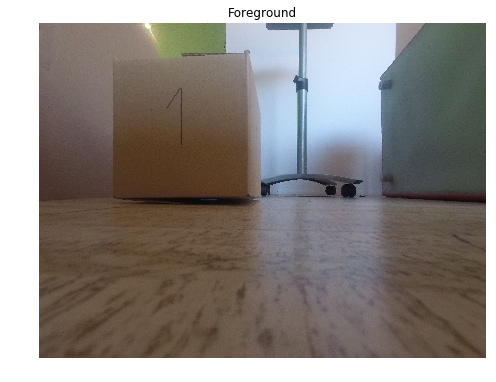

In [8]:
bg = cv2.imread("resources/calibrationimages/bg_calibration_side.JPG")
fg = cv2.imread("resources/calibrationimages/side_calibration_1.JPG")
displayImage(bg,title='Background')
displayImage(fg,title='Foreground')

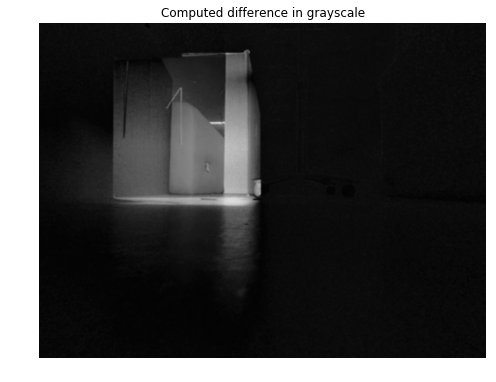

In [9]:
diff = cv2.absdiff(fg, bg)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

displayImage(mask,title='Computed difference in grayscale')

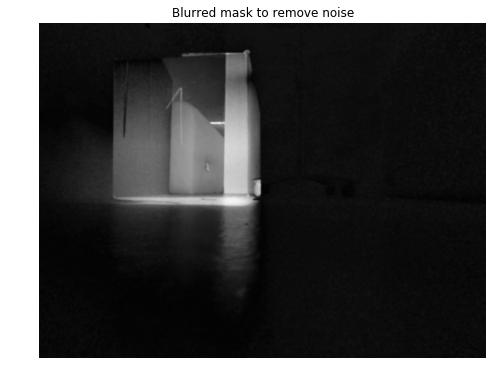

In [10]:
# remove 'salt and pepper' noise: medianBlur should work better for this
#mask = cv2.blur(mask, (13,13))
#mask = cv2.GaussianBlur(mask, (13,13), 0)
mask = cv2.medianBlur(mask, 13)
displayImage(mask, title='Blurred mask to remove noise')

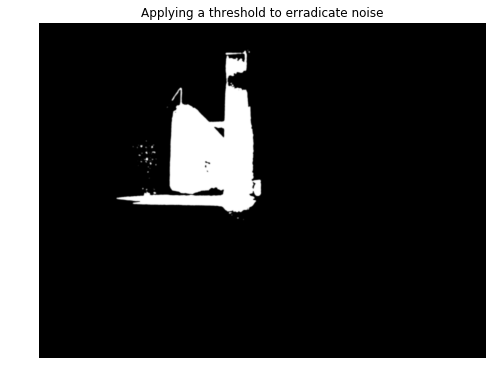

In [11]:
th = 50
imask =  mask>th
displayImage(imask, title='Applying a threshold to erradicate noise')

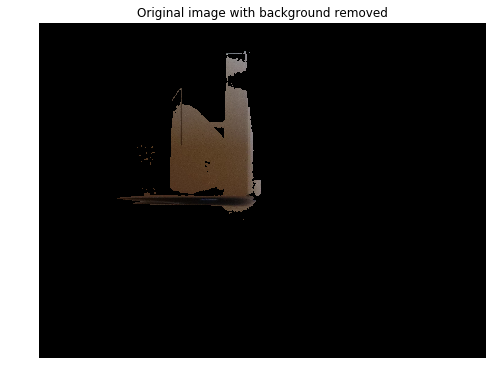

In [12]:
canvas = np.zeros_like(fg, np.uint8)
canvas[imask] = fg[imask]

displayImage(canvas, title='Original image with background removed')